In [1]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras import layers as L
from tensorflow.keras.preprocessing import image

In [2]:
DIR='images/original Dataset'

In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [3]:
train_data.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [4]:
test_data.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [6]:
class_names=train_data.loc[:,'healthy':].columns

In [7]:
number=0
train_data['label']=0
for i in class_names:
    train_data['label']=train_data['label'] + train_data[i] * number
    number=number+1

In [8]:
train_data.head()

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [9]:
natsort.natsorted(os.listdir(DIR))

['Test_0.jpg',
 'Test_1.jpg',
 'Test_2.jpg',
 'Test_3.jpg',
 'Test_4.jpg',
 'Test_5.jpg',
 'Test_6.jpg',
 'Test_7.jpg',
 'Test_8.jpg',
 'Test_9.jpg',
 'Test_10.jpg',
 'Test_11.jpg',
 'Test_12.jpg',
 'Test_13.jpg',
 'Test_14.jpg',
 'Test_15.jpg',
 'Test_16.jpg',
 'Test_17.jpg',
 'Test_18.jpg',
 'Test_19.jpg',
 'Test_20.jpg',
 'Test_21.jpg',
 'Test_22.jpg',
 'Test_23.jpg',
 'Test_24.jpg',
 'Test_25.jpg',
 'Test_26.jpg',
 'Test_27.jpg',
 'Test_28.jpg',
 'Test_29.jpg',
 'Test_30.jpg',
 'Test_31.jpg',
 'Test_32.jpg',
 'Test_33.jpg',
 'Test_34.jpg',
 'Test_35.jpg',
 'Test_36.jpg',
 'Test_37.jpg',
 'Test_38.jpg',
 'Test_39.jpg',
 'Test_40.jpg',
 'Test_41.jpg',
 'Test_42.jpg',
 'Test_43.jpg',
 'Test_44.jpg',
 'Test_45.jpg',
 'Test_46.jpg',
 'Test_47.jpg',
 'Test_48.jpg',
 'Test_49.jpg',
 'Test_50.jpg',
 'Test_51.jpg',
 'Test_52.jpg',
 'Test_53.jpg',
 'Test_54.jpg',
 'Test_55.jpg',
 'Test_56.jpg',
 'Test_57.jpg',
 'Test_58.jpg',
 'Test_59.jpg',
 'Test_60.jpg',
 'Test_61.jpg',
 'Test_62.jpg',
 '

In [10]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train_data.loc[train_data['image_id']==img]['label']
        return label

In [11]:
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR,img)
        
        if search("Train",img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,'images/train/healthy')
            
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,'images/train/multiple_disease')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,'images/train/rust')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,'images/train/scab')
                
        elif search("Test",img):
            shutil.copy(path,'images/test')

In [12]:
shutil.os.mkdir('images/train')
shutil.os.mkdir('images/train/healthy')
shutil.os.mkdir('images/train/multiple_disease')
shutil.os.mkdir('images/train/rust')
shutil.os.mkdir('images/train/scab')
shutil.os.mkdir('images/test')

In [13]:
train_dir=create_train_data()

100%|██████████████████████████████████████████████████████████████████████████████| 3642/3642 [00:54<00:00, 67.18it/s]


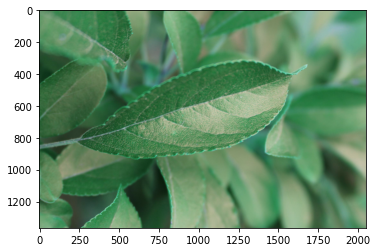

In [5]:
Train_DIR='images/train'
Categories=['healthy','multiple_disease','rust','scab']

for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break

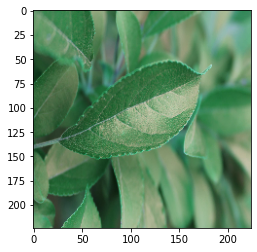

In [6]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

In [7]:
datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,
                           validation_split=0.2)


train_datagen=datagen.flow_from_directory('images/train',target_size=(IMG_SIZE,IMG_SIZE),batch_size=16,
                                          class_mode='categorical',subset='training')

val_datagen=datagen.flow_from_directory('images/train',target_size=(IMG_SIZE,IMG_SIZE),batch_size=16,
                                        class_mode='categorical',subset='validation')

Found 1458 images belonging to 4 classes.
Found 363 images belonging to 4 classes.


In [17]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

In [18]:
#compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
checkpoint=ModelCheckpoint('model_weight/custom_model.h5',monitor='val_loss',mode='min',save_best_only=True,verbose=1)

earlystop=EarlyStopping(monitor='val_loss',min_delta=0,patience=10,verbose=1,restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [20]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,epochs=50,
                                  steps_per_epoch=train_datagen.samples//16,validation_steps=val_datagen.samples//16,
                                  callbacks=callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
91/91 [==============================] - ETA: 0s - loss: 1.2853 - accuracy: 0.3356
Epoch 00001: val_loss improved from inf to 1.25821, saving model to model_weight/custom_model.h5
91/91 [==============================] - 113s 1s/step - loss: 1.2853 - accuracy: 0.3356 - val_loss: 1.2582 - val_accuracy: 0.3097
Epoch 2/50
91/91 [==============================] - ETA: 0s - loss: 1.2157 - accuracy: 0.3974
Epoch 00002: val_loss improved from 1.25821 to 1.15142, saving model to model_weight/custom_model.h5
91/91 [==============================] - 105s 1s/step - loss: 1.2157 - accuracy: 0.3974 - val_loss: 1.1514 - val_accuracy: 0.4574
Epoch 3/50
91/91 [==============================] - ETA: 0s - loss: 0.9854 - accuracy: 0.5520
Epoch 00003: val_loss improved from 1.15142 to 0.78488, saving model to model_weight/custom_model.h5
91/91 [==============================] - 108s 1s/step - loss: 0.9854 - accuracy: 0.

Epoch 27/50
91/91 [==============================] - ETA: 0s - loss: 0.2204 - accuracy: 0.9300
Epoch 00027: val_loss did not improve from 0.20327
91/91 [==============================] - 120s 1s/step - loss: 0.2204 - accuracy: 0.9300 - val_loss: 0.2598 - val_accuracy: 0.9091
Epoch 28/50
91/91 [==============================] - ETA: 0s - loss: 0.2159 - accuracy: 0.9265
Epoch 00028: val_loss did not improve from 0.20327
91/91 [==============================] - 115s 1s/step - loss: 0.2159 - accuracy: 0.9265 - val_loss: 0.3013 - val_accuracy: 0.9034
Epoch 29/50
91/91 [==============================] - ETA: 0s - loss: 0.1942 - accuracy: 0.9376
Epoch 00029: val_loss did not improve from 0.20327
91/91 [==============================] - 106s 1s/step - loss: 0.1942 - accuracy: 0.9376 - val_loss: 0.2438 - val_accuracy: 0.9176
Epoch 30/50
91/91 [==============================] - ETA: 0s - loss: 0.2065 - accuracy: 0.9341
Epoch 00030: val_loss did not improve from 0.20327
91/91 [===================

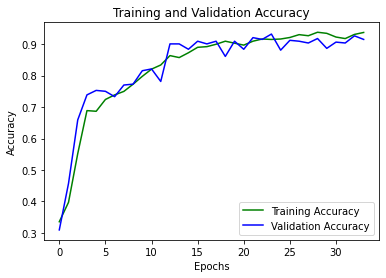

In [24]:
train=model_history.history['accuracy']
val=model_history.history['val_accuracy']
epochs=range(0,34)
plt.plot(epochs,train,'g',label='Training Accuracy')
plt.plot(epochs,val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

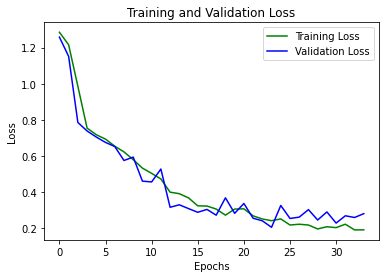

In [26]:
train=model_history.history['loss']
val=model_history.history['val_loss']
epochs=range(0,34)
plt.plot(epochs,train,'g',label='Training Loss')
plt.plot(epochs,val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

2


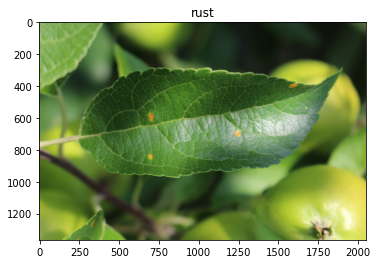

In [33]:
test_image='images/train/rust/Train_10.jpg'
image_result=Image.open(test_image)
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['healthy','multiple_disease','rust','scab']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()

## 2.Alexnet

In [21]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output 
model.add(Dense(4))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_9 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_10 (Activation)   (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 256)        

In [22]:
#compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
checkpoint=ModelCheckpoint('model_weight/Alexnet.h5',monitor='val_loss',mode='min',save_best_only=True,verbose=1)

earlystop=EarlyStopping(monitor='val_loss',min_delta=0,patience=10,verbose=1,restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [24]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,epochs=50,
                                  steps_per_epoch=train_datagen.samples//16,validation_steps=val_datagen.samples//16,
                                  callbacks=callbacks)

Epoch 1/50
91/91 [==============================] - ETA: 0s - loss: 2.0615 - accuracy: 0.3669
Epoch 00001: val_loss improved from inf to 5.54506, saving model to model_weight/Alexnet.h5
91/91 [==============================] - 105s 1s/step - loss: 2.0615 - accuracy: 0.3669 - val_loss: 5.5451 - val_accuracy: 0.2614
Epoch 2/50
91/91 [==============================] - ETA: 0s - loss: 1.5173 - accuracy: 0.3842
Epoch 00002: val_loss improved from 5.54506 to 1.33227, saving model to model_weight/Alexnet.h5
91/91 [==============================] - 102s 1s/step - loss: 1.5173 - accuracy: 0.3842 - val_loss: 1.3323 - val_accuracy: 0.3807
Epoch 3/50
91/91 [==============================] - ETA: 0s - loss: 1.4681 - accuracy: 0.3863
Epoch 00003: val_loss did not improve from 1.33227
91/91 [==============================] - 97s 1s/step - loss: 1.4681 - accuracy: 0.3863 - val_loss: 1.3521 - val_accuracy: 0.4233
Epoch 4/50
91/91 [==============================] - ETA: 0s - loss: 1.4480 - accuracy: 0.3

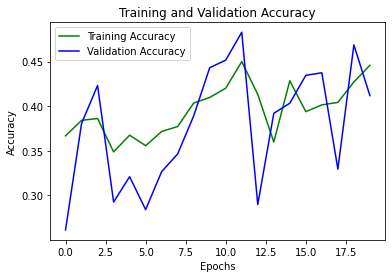

In [26]:
train=model_history.history['accuracy']
val=model_history.history['val_accuracy']
epochs=range(0,20)
plt.plot(epochs,train,'g',label='Training Accuracy')
plt.plot(epochs,val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

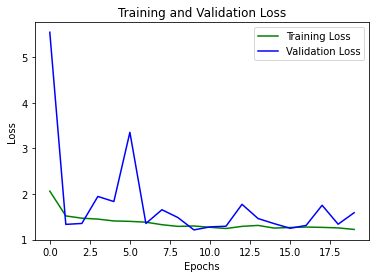

In [27]:
train=model_history.history['loss']
val=model_history.history['val_loss']
epochs=range(0,20)
plt.plot(epochs,train,'g',label='Training Loss')
plt.plot(epochs,val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

2


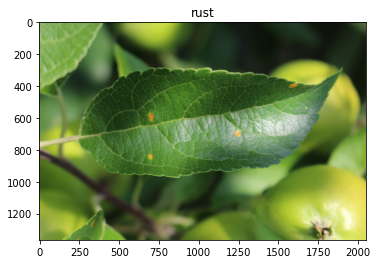

In [28]:
test_image='images/train/rust/Train_10.jpg'
image_result=Image.open(test_image)
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['healthy','multiple_disease','rust','scab']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()

## VGG16

In [8]:
model = Sequential()
#Convolution1
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#Maxpolling1
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#Convolution2
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#Maxpooling2
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#Convolution3
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#maxpooling3
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#Convolutional4
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#maxpooling4
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#Convolution5
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#maxpooling 5
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(L.GlobalAveragePooling2D())
model.add(Dense(4, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [10]:
#compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
checkpoint=ModelCheckpoint('model_weight/vgg16.h5',monitor='val_loss',mode='min',save_best_only=True,verbose=1)

earlystop=EarlyStopping(monitor='val_loss',min_delta=0,patience=10,verbose=1,restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [12]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,epochs=10,
                                  steps_per_epoch=train_datagen.samples//16,validation_steps=val_datagen.samples//16,
                                  callbacks=callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
91/91 [==============================] - ETA: 0s - loss: 1.3646 - accuracy: 0.3474 
Epoch 00001: val_loss improved from inf to 1.24541, saving model to model_weight/vgg16.h5
91/91 [==============================] - 1004s 11s/step - loss: 1.3646 - accuracy: 0.3474 - val_loss: 1.2454 - val_accuracy: 0.3438
Epoch 2/10
91/91 [==============================] - ETA: 0s - loss: 1.2621 - accuracy: 0.3121 
Epoch 00002: val_loss did not improve from 1.24541
91/91 [==============================] - 1188s 13s/step - loss: 1.2621 - accuracy: 0.3121 - val_loss: 1.2479 - val_accuracy: 0.3295
Epoch 3/10
91/91 [==============================] - ETA: 0s - loss: 1.2464 - accuracy: 0.3301 
Epoch 00003: val_loss improved from 1.24541 to 1.24495, saving model to model_weight/vgg16.h5
91/91 [==============================] - 1267s 14s/step - loss: 1.2464 - accuracy: 0.3301 - val_loss: 1.2449 - val_accuracy: 0.3324
Epoch 4/